# House prices and residential investments

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


## Model description

We use a static modelling of the housing market from Sørensen and Whitta-Jacobsen 2010, Introducing Advanced Macroecnomics.

**Supply**

A representative construction firm operates in a perfectly competitive market, producing and selling housing stock. The firm utilizes the production function $I = A \cdot X^{\beta}$ to produce its housing stock, where $X = aL + bQ$ is a composite input consisting of $a$ units of labor and $b$ units of materials. The condition $0 < \beta < 1$ ensures diminishing returns to scale, which is reasonable since land is scarce in both the short and long run. The price of one composite input is referred to as construction costs and equals $P = aW + bp^Q$. The representative firm's maximization problem is given by 
\begin{equation}
\underset{I}{\arg\max}\ \Pi(I)=\underset{I}{\arg\max}\ P^HI-PX=\underset{I}{\arg\max}\ P^HI-P\left(\frac{I}{A}\right)^\frac{1}{\beta}
\end{equation}
where $P^H$ represents house prices. The housing stock evolves according to the identity $H_{+1} = H(1 - \delta) + I^*$. In the absence of economic and population growth, it is plausible to assume that $I^* = \delta H \iff H = \frac{I^*}{\delta}$ in the long run.

**Demand**

A representative consumer with Cobb-Douglas utility maximizes
\begin{equation*}
\underset{H,C}{\arg\max}\ H^\eta C^{1-\eta}, \; \text{st.} \; (1-m)Y= C+uP^HH
\end{equation*}
where $H$ is consumption of housing service, $C$ is consumption of other nondurable goods than housing and $\eta$ denotes relative preference for housing. The price of nondurable goods is normalized to 1. The budget constraint implies that disposable income $(1-m)Y$ equals the sum of consumption of nondurable goods and user costs related to housing service. The user costs are given as
\begin{equation*}
u=(1-d)i-\pi^e+\delta+\tau)P^HH
\end{equation*}
The consumer pays interest $i$ on mortgage debt, however the government offers mortgage relief to such an extend that a fracition $d$ is deducted from interest expenses. Hence the after tax interest rate is $(1-d)i$, and the after tax real interest rate is $(1-d)i-\pi^e$. $\delta$ is the depreciation costs of housing, which inflicts a cost to the consumer. Finally $\tau$ is the effective tax rate on real estate.

## Analytical solution

We will derive the analytical solution manually first

**Supply**

The firm selects a production level at the intersection between marginal revenue and marginal costs: $\frac{\partial\left( P^HI\right)}{\partial I}=\frac{\partial\left( PX\right)}{\partial I}\iff \frac{\partial\Pi}{\partial I}=0$, which is the first order condition. Solving for $I$ yields the optimal production level:
\begin{equation*}
    \frac{\partial\Pi}{\partial I}=0\implies P^H-\frac{P}{A\beta}\left(\frac{I}{A}\right)^{\frac{1-\beta}{\beta}}=0\iff
\end{equation*}
 
\begin{equation}
    I^*=\beta^\frac{\beta}{1-\beta}A^\frac{1}{1-\beta}\left(\frac{P^H}{P}\right)^\frac{\beta}{1-\beta}
\end{equation}
In steady state: $I^*=\delta H\iff H=\frac{I^*}{\delta}$. Thus, a long-run supply curve for housing is given by:
\begin{equation}
    H^s=\frac{\beta^\frac{\beta}{1-\beta}A^\frac{1}{1-\beta}}{\delta}\left(\frac{P^H}{P}\right)^\frac{\beta}{1-\beta}
\end{equation}

**Demand**

Solve for $C$ in the budget constraint
\begin{equation}
    C=(1-m)Y-uP^HH
\end{equation}
Substitute in the utility function
\begin{equation}
   u(H) = H^\eta\left((1-m)Y-uP^HH\right)^{1-\eta}
\end{equation}
FOC
\begin{equation}
   \frac{du}{dH} = 0\iff \eta H^{\eta-1}\left((1-m)Y-uP^HH\right)^{1-\eta}-H^\eta (1-\eta)\left((1-m)Y-uP^HH\right)^{-\eta}uP^H=0\iff
\end{equation}

\begin{equation}
   H^d=\frac{\eta(1-m)Y}{uP^H} = \frac{\eta(1-m)Y}{((1-d)i-\pi^e+\delta+\tau)P^H}
\end{equation}

**Equilibrium**

The partial equilibrium must satisfy: $H^s=H^d$. Solve for $P^H$ and $H$ to find the equilibrium clearing price and quantity:
\begin{equation}
    \left(P^H\right)^*=\frac{P^\beta}{\beta^{\beta}A}\left(\frac{\delta\eta(1-m)Y}{(1-d)i-\pi^e+\delta+\tau}\right)^{1-\beta}
\end{equation}

\begin{equation}
    H^*=\beta^{\beta}A\left(\frac{1}{\delta}\right)^{1-\beta}\left(\frac{\eta(1-m)Y}{((1-d)i-\pi^e+\delta+\tau)P}\right)^\beta
\end{equation}


## Analytical solution using sympy

This section derives the analytical solution using sympy. Below sybols are defined

In [2]:
PH = sm.symbols('P^H')
I = sm.symbols('I')
P = sm.symbols('P')
A = sm.symbols('A')
beta = sm.symbols('beta')
H = sm.symbols('H')
delta = sm.symbols('delta')
C = sm.symbols('C')
eta = sm.symbols('eta')
m = sm.symbols('m')
Y = sm.symbols('Y')
d = sm.symbols('d')
i = sm.symbols('i')
pi = sm.symbols('pi')
tau = sm.symbols('tau')

### Supply

In [3]:
#Defining profit function
profit = PH*I-P*(I/A)**(1/beta)
profit

I*P^H - P*(I/A)**(1/beta)

In [4]:
# Firts order condition. Note this is an unconstrained optimization problem of 1 variable.
foc_s = sm.diff(profit, I)
foc_s

P^H - P*(I/A)**(1/beta)/(I*beta)

In [5]:
# Solving for optimal investment level
sol_s = sm.solve(sm.Eq(foc_s,0), I)
sol_s[0]

(P/(A**(1/beta)*P^H*beta))**(beta/(beta - 1))

In [6]:
# This implies the following long-run supply curve as argued above
H_s = sol_s[0]/delta
H_s

(P/(A**(1/beta)*P^H*beta))**(beta/(beta - 1))/delta

In [7]:
# Solving for PH in the equation above to find an inverse supply function. We use this to find the equilibrium housing stock level later.
PH_s = sm.solve(sm.Eq(H_s,H),PH)
PH_s[0]

P*(H*delta)**((1 - beta)/beta)/(A**(1/beta)*beta)

### Demand

In [8]:
# Defining utility function and budget constraint. Note this is a constrained optimization problem of 2 variables.
utility = H**eta*C**(1-eta)
utility
budget_constraint = sm.Eq(C+((1-d)*i-pi+delta+tau)*PH*H,(1-m)*Y)
budget_constraint

Eq(C + H*P^H*(delta + i*(1 - d) - pi + tau), Y*(1 - m))

In [9]:
# isolate C on LHS in the budget constraint
C_from_con = sm.solve(budget_constraint, C)
C_from_con[0]

H*P^H*d*i - H*P^H*delta - H*P^H*i + H*P^H*pi - H*P^H*tau - Y*m + Y

In [10]:
# Substituting C into the utility function
utility_subs = utility.subs(C, C_from_con[0])
utility_subs

H**eta*(H*P^H*d*i - H*P^H*delta - H*P^H*i + H*P^H*pi - H*P^H*tau - Y*m + Y)**(1 - eta)

In [11]:
#First order condition with respect to H
foc_d = sm.diff(utility_subs, H)
foc_d

H**eta*(1 - eta)*(P^H*d*i - P^H*delta - P^H*i + P^H*pi - P^H*tau)*(H*P^H*d*i - H*P^H*delta - H*P^H*i + H*P^H*pi - H*P^H*tau - Y*m + Y)**(1 - eta)/(H*P^H*d*i - H*P^H*delta - H*P^H*i + H*P^H*pi - H*P^H*tau - Y*m + Y) + H**eta*eta*(H*P^H*d*i - H*P^H*delta - H*P^H*i + H*P^H*pi - H*P^H*tau - Y*m + Y)**(1 - eta)/H

In [12]:
# Solving to find a demand function for housing service
sol_d = sm.solve(sm.Eq(foc_d,0), H)
H_d = sol_d[0]
H_d

Y*eta*(m - 1)/(P^H*(d*i - delta - i + pi - tau))

In [13]:
#Isolating PH in the demand function to find an inverse demand function. We use this to find the equilibrium housing stock level below
PH_d = sm.solve(sm.Eq(H_d,H),PH)
PH_d[0]

Y*eta*(1 - m)/(H*(-d*i + delta + i - pi + tau))

### Equilibrium

In [14]:
#We equalize the inverse supply and demand function and solve for H to find the steady state equilibrium of housing stock as function of parameters
equilibrium_H = sm.Eq(PH_s[0],PH_d[0])
sol_equilibrium_H = sm.solve(equilibrium_H,H)
sol_equilibrium_H[0]
# This is equal to the solution found manually - only more messy

(A**(1/beta)*Y*beta*delta*eta*(1 - m)/(P*(-d*i + delta + i - pi + tau)))**beta/delta

In [15]:
#We equalize the supply and demand functions and solve for PH to find the steady state equilibrium house prices level as function of parameters
equilibrium_PH = sm.Eq(H_s,H_d)
sol_equilibrium_PH = sm.solve(equilibrium_PH,PH)
sol_equilibrium_PH[0]
# This is equal to the solution found manually - only more messy

(-Y*beta**(beta/(beta - 1))*delta*eta*(m - 1)*exp(log(A)/(beta - 1))/(P**(beta/(beta - 1))*(-d*i + delta + i - pi + tau)))**(1 - beta)

##### We use lambdafication of the equilibrium price and quantity in order to conduct comparative statics

In [16]:
#We lambdify the equilibrium quntity and price
eq_H_func = sm.lambdify(args=(A,Y,beta,delta,eta,m,P,d,i,pi,tau),expr=sol_equilibrium_H[0])
eq_PH_func = sm.lambdify(args=(A,Y,beta,delta,eta,m,P,d,i,pi,tau),expr=sol_equilibrium_PH[0])

# We assign values to the paramters. To begin with, We consider changes in the interest rate.
A_val = 1
Y_val = 10000
beta_val = 0.9
delta_val = 0.02
eta_val = 0.5
m_val = 0.4
P_val = 1
d_val = 0.3
i_val = np.array([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08])
pi_val = 0.02
tau_val = 0.02

#Calculate equilibrium price and quantity based on paramters above
Heqs = eq_H_func(A_val,Y_val,beta_val,delta_val,eta_val,m_val,P_val,d_val,i_val,pi_val,tau_val)
PHeqs = eq_PH_func(A_val,Y_val,beta_val,delta_val,eta_val,m_val,P_val,d_val,i_val,pi_val,tau_val)


##### Response of equilibrium price and quantity to changes in the interest rate

The response of equilibrium price and quantity to changes in the interest rate exhibits marginal adjustment in prices. However, a notable increase in the housing stock is observed when the interest rates decrease. This phenomenon arises due to the reduction in user costs, which in turn stimulates demand. In the short run, a substantial increase in prices occurs, thereby prompting investments and making construction more profitable. In the long run, the augmented housing stock results in a decline in prices. Nevertheless, prices are sustained at a higher level due to diminishing returns to scale, as $\beta<1$.



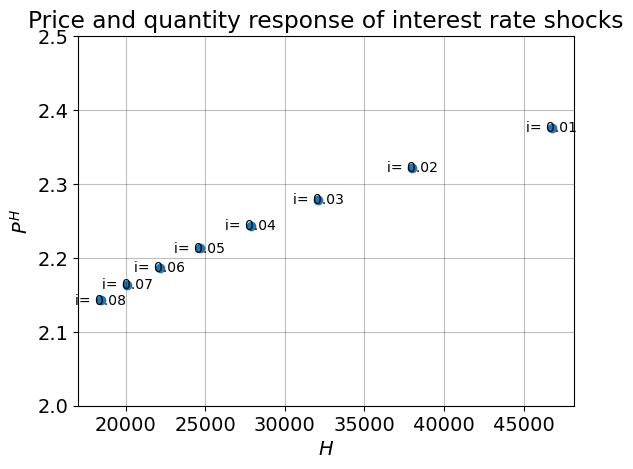

In [17]:
#These arrays are to contain equilibrium price and quantities for different values of i
Heqs0 = np.zeros((len(i_val),))
PHeqs0 = np.zeros((len(i_val),))

#Calculate equillbria for different values of i and store in arrays defined above
for v0, d0 in enumerate(Heqs):
    Heqs0[v0] = d0
for v0, d0 in enumerate(PHeqs):
    PHeqs0[v0] = d0

#Plot
plt.scatter(Heqs0, PHeqs0)

for v0, (x0, y0) in enumerate(zip(Heqs0, PHeqs0)):
    plt.text(x0, y0, f"i= {(v0+1)/100}", fontsize=10, ha="center", va="center")

# add axis labels and title
plt.ylabel(r'$P^H$')
plt.xlabel(r'$H$')
plt.title('Price and quantity response of interest rate shocks')
plt.yticks(np.arange(2, 2.51, 0.1))

# show the plot
plt.show()


##### Response of equilibrium price and quantity to changes in construction costs

As it appears from the figure below, house prices respond heavily to changes in construction costs, while the response of the housing stock is relatively moderate. This outcome stems from the fact that higher construction costs depress supply, thereby causing prices to rise. Conversely, the rise in house prices stimulates investments and thus the housing stock, implying that the long-run effect on housing stock is moderate.

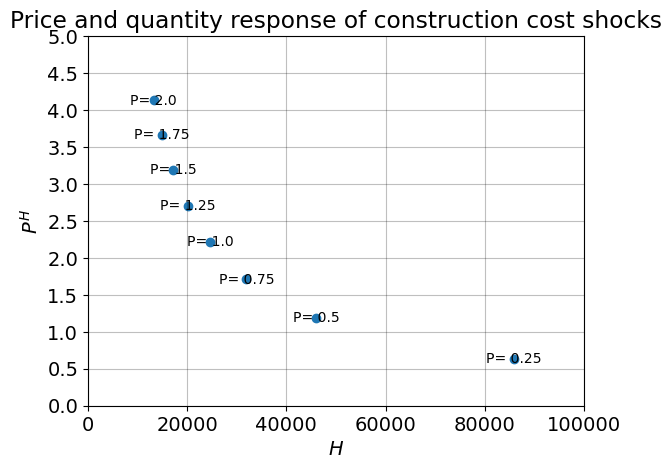

In [18]:
# We assign values to the paramters. We now consider changes in construction costs
A_val = 1
Y_val = 10000
beta_val = 0.9
delta_val = 0.02
eta_val = 0.5
m_val = 0.4
P_val = np.array([0.25,0.50,0.75,1,1.25,1.50,1.75,2.00])
d_val = 0.3
i_val = 0.05
pi_val = 0.02
tau_val = 0.02


Heqs = eq_H_func(A_val,Y_val,beta_val,delta_val,eta_val,m_val,P_val,d_val,i_val,pi_val,tau_val)
PHeqs = eq_PH_func(A_val,Y_val,beta_val,delta_val,eta_val,m_val,P_val,d_val,i_val,pi_val,tau_val)

#These arrays are to contain equilibrium price and quantities for different values of P
Heqs0 = np.zeros((len(P_val),))
PHeqs0 = np.zeros((len(P_val),))

#Calculate equillbria for different values of P and store in arrays defined above
for v1, d1 in enumerate(Heqs):
    Heqs0[v1] = d1
for v1, d1 in enumerate(PHeqs):
    PHeqs0[v1] = d1

#plot
plt.scatter(Heqs0, PHeqs0)

for v1, (x1, y1) in enumerate(zip(Heqs0, PHeqs0)):
    plt.text(x1, y1, f"P= {(v1+1)/4}", fontsize=10, ha="center", va="center")

# add axis labels and title
plt.ylabel(r'$P^H$')
plt.xlabel(r'$H$')
plt.title('Price and quantity response of construction cost shocks')
plt.xticks(np.arange(0, 100001, 20000))
plt.yticks(np.arange(0, 5.01, 0.5))

# show the plot
plt.show()

##### Response of equilibrium price and quantity to changes in the degree of diminishing returns to scale

As it appears from the figure below, both house prices and the housing stock respond quite heavily yo changes in the degree of diminish returns to scale.

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in reciprocal
  return (A**(beta**(-1.0))*Y*beta*delta*eta*(1 - m)/(P*(-d*i + delta + i - pi + tau)))**beta/delta


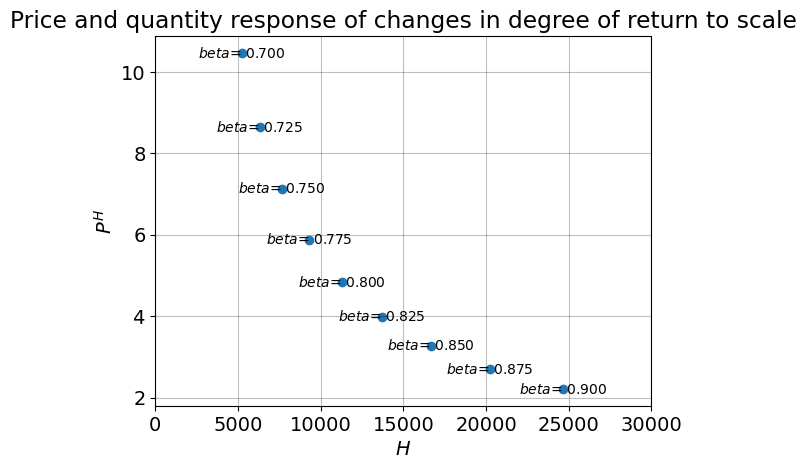

In [19]:
# We assign values to the paramters. Finally, we consider changes in the degree of diminishing returns to scale
A_val = 1
Y_val = 10000
beta_val = np.array([0.700,0.725,0.750,0.775,0.800,0.825,0.850,0.875,0.9])
delta_val = 0.02
eta_val = 0.5
m_val = 0.4
P_val = 1
d_val = 0.3
i_val = 0.05
pi_val = 0.02
tau_val = 0.02

Heqs = eq_H_func(A_val,Y_val,beta_val,delta_val,eta_val,m_val,P_val,d_val,i_val,pi_val,tau_val)
PHeqs = eq_PH_func(A_val,Y_val,beta_val,delta_val,eta_val,m_val,P_val,d_val,i_val,pi_val,tau_val)

#These arrays are to contain equilibrium price and quantities for different values of beta
Heqs0 = np.zeros((len(beta_val),))
PHeqs0 = np.zeros((len(beta_val),))

#Calculate equillbria for different values of beta and store in arrays defined above
for v2, d2 in enumerate(Heqs):
    Heqs0[v2] = d2
for v2, d2 in enumerate(PHeqs):
    PHeqs0[v2] = d2

#plot
plt.scatter(Heqs0, PHeqs0)

for v2, (x2, y2) in enumerate(zip(Heqs0, PHeqs0)):
    plt.text(x2, y2, f"$beta$= {0.700+(v2/40):.3f}", fontsize=10, ha="center", va="center")

# add axis labels and title
plt.ylabel(r'$P^H$')
plt.xlabel(r'$H$')
plt.title('Price and quantity response of changes in degree of return to scale')
plt.xticks(np.arange(0, 30001, 5000))

# show the plot
plt.show()

## Numerical solution

### Supply side

##### We solve the construction firm's optimization problem for different values of $\beta$ and $P^H$. This lets us plot supply curves for different degrees of diminishing returns to scale

In [20]:
#Define profit function
def profit(I, PH, P, A, beta):
    return PH*I - P*(I/A)**(1/beta)

#Assign values to parameters
P = 1
A = 1
delta = 0.02

# Define range of beta and PH values
beta_values = np.linspace(0.8, 0.9, num=6)
PH_values = np.linspace(0, 10, num=100)

# Create an empty array to store the results
I_opt_s = np.zeros((len(beta_values), len(PH_values)))
H_opt_s = np.zeros((len(beta_values), len(PH_values)))

# Loop over beta and PH values and solve the profit function
for i, beta in enumerate(beta_values):
    for j, PH in enumerate(PH_values):
        result = optimize.minimize_scalar(lambda x: -profit(x,PH,P,A,beta), method='golden')
        I = result.x
        pi = profit(I,PH,P,A,beta)
        I_opt_s[i,j] = I  # Store optimal investment level
        H_opt_s[i,j] = I/delta  # Store steady state housing stock level

/var/folders/2d/ksv407rj30z_gz_g2npsz8br0000gn/T/ipykernel_54555/637914768.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return PH*I - P*(I/A)**(1/beta)


##### Optimal investment level for different values of $\beta$ and $P^H$

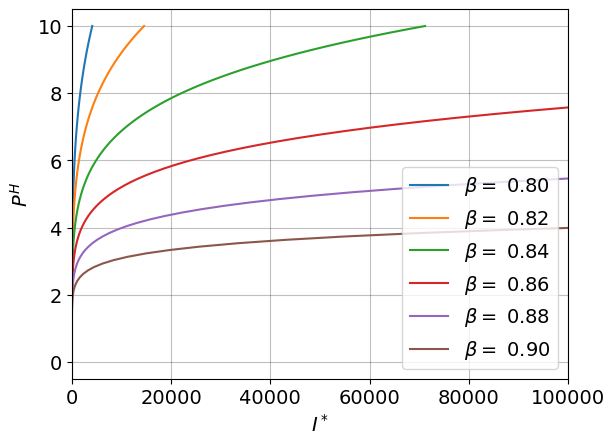

In [21]:
fig = plt.figure()
for v, beta in enumerate(beta_values):
    plt.plot(I_opt_s[v,:],PH_values, label=r'$\beta=$ {:.2f}'.format(beta))
plt.xlabel(r'$I^*$')
plt.ylabel(r'$P^H$')
plt.xlim(0, 100000)
plt.legend()

##### Long-run supply curve for different values of $\beta$ and $P^H$ given that $H^s=\frac{I^*}{\delta}$

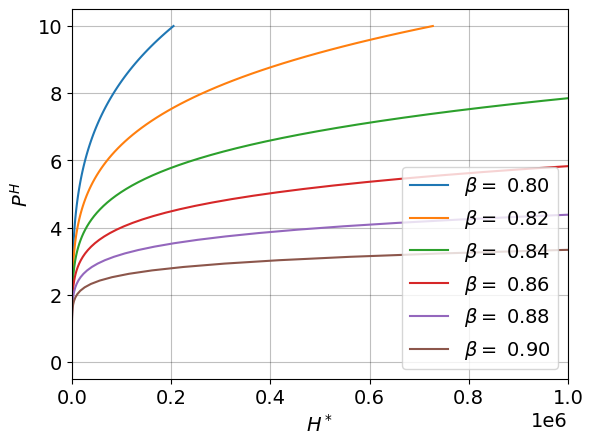

In [22]:
fig = plt.figure()
for v, beta in enumerate(beta_values):
    plt.plot(H_opt_s[v,:],PH_values, label=r'$\beta=$ {:.2f}'.format(beta))
plt.xlabel(r'$H^*$')
plt.ylabel(r'$P^H$')
plt.xlim(0, 1000000)
plt.legend()

Observe how the elasticity of the supply curve increases as the degree of diminishing returns to scale decreases, i.e $\beta$ increases. Notice how much more responsive $\beta=0.9$ is to changes in house prices compared to higher degree of diminishing returns to scale.

### Demand

In [23]:
del i,j

#Define utility function
def u_func(H,C,eta):
    return H**eta * C**(1-eta)

#Assign values to parameters
Y=10000
m=0.4
d=0.3
i=0.05
pie=0.02
delta=0.02
tau=0.02
u=(1-d)*i-pie+delta+tau
Y_disp = (1-m)*Y


# Define range of beta and PH values
eta_values = np.linspace(0.1, 0.9, num=5)
PH_values = np.linspace(0, 10, num=100)

# Create an empty array to store the results
H_opt_d = np.zeros((len(eta_values), len(PH_values)))
C_opt_d = np.zeros((len(eta_values), len(PH_values)))

# Loop over beta and PH values and solve the profit function
for i, eta in enumerate(eta_values):
    for j, PH in enumerate(PH_values):
        # a. objective function (to minimize)
        def value_of_choice(x,eta,PH,u,Y_disp):
        # note: x is a array, but u_func takes scalars.
            return -u_func(x[0],x[1],eta)

        # b. constraints (violated if negative) and bounds. x is an array.
        constraints = ({'type': 'ineq', 'fun': lambda x:  Y_disp-PH*u*x[0]-x[1]})
        bounds = ((0,Y_disp/(PH*u)),(0,Y_disp))

        # c. call solver, use SLSQP
        initial_guess = [Y_disp/PH/2,Y_disp/2]

        sol_case2 = optimize.minimize(
            value_of_choice, initial_guess, args=(eta,PH,u,Y_disp),
            method='SLSQP', bounds=bounds, constraints=constraints)
        
        # d. unpack solution
        utility = u_func(H,C,eta)
        H_opt_d[i,j] = sol_case2.x[0]
        C_opt_d[i,j] = sol_case2.x[1]

/var/folders/2d/ksv407rj30z_gz_g2npsz8br0000gn/T/ipykernel_54555/2862095662.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  bounds = ((0,Y_disp/(PH*u)),(0,Y_disp))
/var/folders/2d/ksv407rj30z_gz_g2npsz8br0000gn/T/ipykernel_54555/2862095662.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  initial_guess = [Y_disp/PH/2,Y_disp/2]
/var/folders/2d/ksv407rj30z_gz_g2npsz8br0000gn/T/ipykernel_54555/2862095662.py:36: RuntimeWarning: invalid value encountered in double_scalars
  constraints = ({'type': 'ineq', 'fun': lambda x:  Y_disp-PH*u*x[0]-x[1]})
/Users/frederik/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:489: RuntimeWarning: invalid value encountered in subtract
  dx = ((x0 + h) - x0)
/Users/frederik/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:57: RuntimeWarning: invalid value encountered in subtract
  upper_dist = ub - x0
/Users/frederik/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_num

##### We plot the demand curve for different values of $\eta$

As expected, the representative consumer demands a more housing service as relative preference for housing increases.

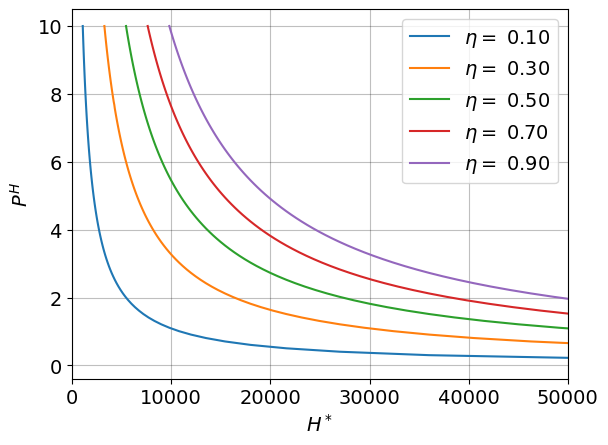

In [24]:
fig = plt.figure()
for v, eta in enumerate(eta_values):
    plt.plot(H_opt_d[v,:],PH_values, label=r'$\eta=$ {:.2f}'.format(eta))
plt.xlabel(r'$H^*$')
plt.ylabel(r'$P^H$')
plt.xlim(0, 50000)
plt.legend()


##### Finally we plot a supply and demand curve together for $\eta=0.50$ and $\beta=0.90$

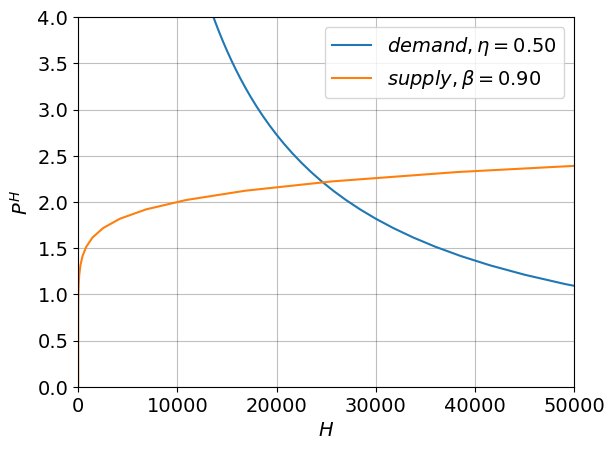

In [25]:
fig = plt.figure()
plt.plot(H_opt_d[2,:],PH_values, label=r'$demand, \eta=0.50$')
plt.plot(H_opt_s[5,:],PH_values, label=r'$supply, \beta=0.90$')
plt.xlabel(r'$H$')
plt.ylabel(r'$P^H$')
plt.xlim(0, 50000)
plt.ylim(0, 4)
plt.legend()

##### We confirm this is indeed an equilibrium using the analytical solution

In [26]:
A_val = 1
Y_val = 10000
beta_val = 0.9
delta_val = 0.02
eta_val = 0.5
m_val = 0.4
P_val = 1
d_val = 0.3
i_val = 0.05
pi_val = 0.02
tau_val = 0.02

Heqs = eq_H_func(A_val,Y_val,beta_val,delta_val,eta_val,m_val,P_val,d_val,i_val,pi_val,tau_val)
PHeqs = eq_PH_func(A_val,Y_val,beta_val,delta_val,eta_val,m_val,P_val,d_val,i_val,pi_val,tau_val)

print(f'Equilibirum housing stock: {Heqs:1.0f}')
print(f'Equilibrium house price: {PHeqs:1.2f}')
print('Which is equivalent to the intersection between the supply and demand curve')

Equilibirum housing stock: 24649
Equilibrium house price: 2.21
Which is equivalent to the intersection between the supply and demand curve


# Conclusion

We investigate the responsiveness of the housing stock and house prices to shifts in fundamental factors, utilizing the housing market model expounded in Sørensen and Whitta-Jacobsen's 2010 publication, "Introducing Advanced Macroeconomics." We solve the model numerically as well as analytically. In the analytical solution, we derive an expression for a partial equilibrium price and quantity. Based on this solution we conduct comparative statics. In particular we analyse how the partial equillibrium respond to changes in interest rates, construction costs and the degree of diminishing returns to scale. The results are in accordance with economic theory. The second part derives supply and demand curves numerically. We derive supply and demand curves for different degree of diminishing returns to scale and relative preference for housing service.